In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#PATH ALLOCATION
data_dir=os.path.join('data')
classes=os.listdir(data_dir)
classes

['Angular Leaf Spot',
 'Bacterial spot',
 'Early blight',
 'Fusarium Wilt',
 'Healthy',
 'Late blight',
 'Leaf Mold',
 'Mosaic virus',
 'Phytophthora Blight',
 'Septoria leaf spot',
 'Spotted spider mite',
 'Target Spot',
 'YellowLeaf Curl Virus']

In [3]:
import os
import cv2

def load_data(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            
            # Attempt to load the image
            image = cv2.imread(image_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Resize the image
                image = cv2.resize(image, (256, 256))
                images.append(image)
                labels.append(class_index)
            else:
                print(f"Error: Unable to load image '{image_path}'")
    return images, labels

# Load and preprocess image data
images, labels = load_data('data')


In [4]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.4, random_state=42, stratify=labels
)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Print shapes for verification
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (2630, 256, 256, 3)
Train labels shape: (2630,)
Test images shape: (1754, 256, 256, 3)
Test labels shape: (1754,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dropout

In [10]:
model=Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(128, activation='relu'))  # Adding another dense layer
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(13, activation='softmax'))

In [11]:
# Define a custom optimizer with a smaller initial learning rate
custom_optimizer = Adam(learning_rate=0.001)

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
history = model.fit(train_images, train_labels, epochs=25, callbacks=[tensorboard_callback])

Epoch 1/25
83/83 [==============================] - 20s 214ms/step - loss: 2.5281 - accuracy: 0.1205
Epoch 2/25
83/83 [==============================] - 19s 225ms/step - loss: 2.3028 - accuracy: 0.2034
Epoch 3/25
83/83 [==============================] - 18s 219ms/step - loss: 2.0678 - accuracy: 0.3053
Epoch 4/25
83/83 [==============================] - 17s 211ms/step - loss: 1.8480 - accuracy: 0.3814
Epoch 5/25
83/83 [==============================] - 17s 209ms/step - loss: 1.6473 - accuracy: 0.4490
Epoch 6/25
83/83 [==============================] - 18s 212ms/step - loss: 1.3269 - accuracy: 0.5559
Epoch 7/25
83/83 [==============================] - 17s 205ms/step - loss: 1.1282 - accuracy: 0.6335
Epoch 8/25
83/83 [==============================] - 17s 208ms/step - loss: 0.9218 - accuracy: 0.7099
Epoch 9/25
83/83 [==============================] - 17s 204ms/step - loss: 0.7079 - accuracy: 0.7662
Epoch 10/25
83/83 [==============================] - 17s 205ms/step - loss: 0.5528 - accura

In [13]:
vis=history.history #gives entire trained DL model info like loss,validation loss and accuracy
vis

{'loss': [2.5280652046203613,
  2.3027641773223877,
  2.067810297012329,
  1.8479890823364258,
  1.647257685661316,
  1.3268805742263794,
  1.1281535625457764,
  0.9218302369117737,
  0.707866370677948,
  0.5528386235237122,
  0.5516347289085388,
  0.3602348864078522,
  0.2810855209827423,
  0.26570671796798706,
  0.240877166390419,
  0.22319604456424713,
  0.18761874735355377,
  0.14696277678012848,
  0.13996540009975433,
  0.12175256758928299,
  0.14133401215076447,
  0.14195573329925537,
  0.10613008588552475,
  0.10652320832014084,
  0.10217014700174332],
 'accuracy': [0.1205323189496994,
  0.20342205464839935,
  0.30532318353652954,
  0.38136881589889526,
  0.4490494430065155,
  0.5558935403823853,
  0.6334601044654846,
  0.7098859548568726,
  0.76615971326828,
  0.8155893683433533,
  0.8201521039009094,
  0.8859315514564514,
  0.9174904823303223,
  0.9159696102142334,
  0.9239543676376343,
  0.938022792339325,
  0.9422053098678589,
  0.9581748843193054,
  0.9627376198768616,
  0.

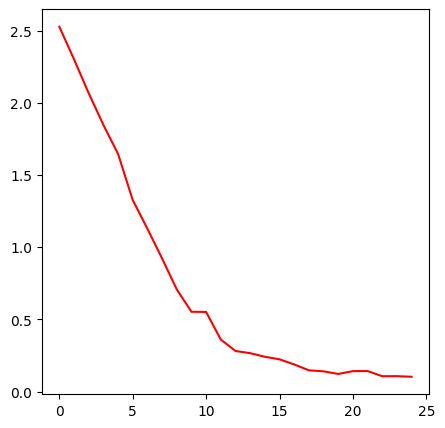

In [14]:
#LOSS VIZULATIZATION
plt.figure(figsize=(5,5))
plt.plot(vis['loss'],color="red",label="loss")
plt.show()
#observe by considering Y axis for both--->graphs down means accuacry increasing

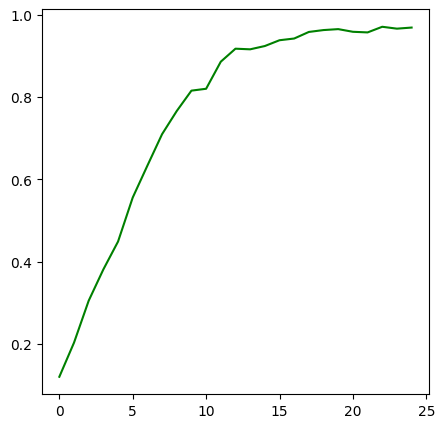

In [15]:
#ACCURACY VIZULIZATION
plt.figure(figsize=(5,5))
plt.plot(vis['accuracy'],color="green",label="accuracy")
plt.show()

In [16]:
#Accuracy Measurements Over Different Samples

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(train_labels, predicted_labels)
print("Accuracy:", accuracy*100,"%")

# Calculate precision
precision = precision_score(train_labels, predicted_labels, average='weighted')
print("Precision:", precision*100, "%")

# Calculate recall
recall = recall_score(train_labels, predicted_labels, average='weighted')
print("Recall:", recall*100, "%")

# Calculate F1 score
f1 = f1_score(train_labels, predicted_labels, average='weighted')
print("F1 Score:", f1*100,"%")

83/83 [==============================] - 5s 60ms/step
Accuracy: 99.80988593155894 %
Precision: 99.81150310850457 %
Recall: 99.80988593155894 %
F1 Score: 99.80950219761444 %


In [19]:
from numpy import *
images_list=[]
prediction_list=[]

def pred(image_name):
    
    display=cv2.imread(image_name)
    
    img=cv2.imread(image_name)
    
    resize=cv2.resize(img,(256,256))
   

    #optimize the new image
    resize=resize/255
    #expand your image array
    img=expand_dims(resize,0)


    predictions = model.predict(img)

    # Convert the predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    



    print("The Detected Status Of the plant is: ",classes[predicted_labels[0]])
    
    
    images_list.append(display)
    prediction_list.append(predicted_labels)

In [20]:
#loaded model prediticion
for i in range(1,5):
    pred('img'+str(i)+'.jpg')

1/1 [==============================] - 0s 55ms/step
The Detected Status Of the plant is:  Angular Leaf Spot
1/1 [==============================] - 0s 52ms/step
The Detected Status Of the plant is:  Angular Leaf Spot
1/1 [==============================] - 0s 32ms/step
The Detected Status Of the plant is:  Late blight
1/1 [==============================] - 0s 48ms/step
The Detected Status Of the plant is:  Fusarium Wilt


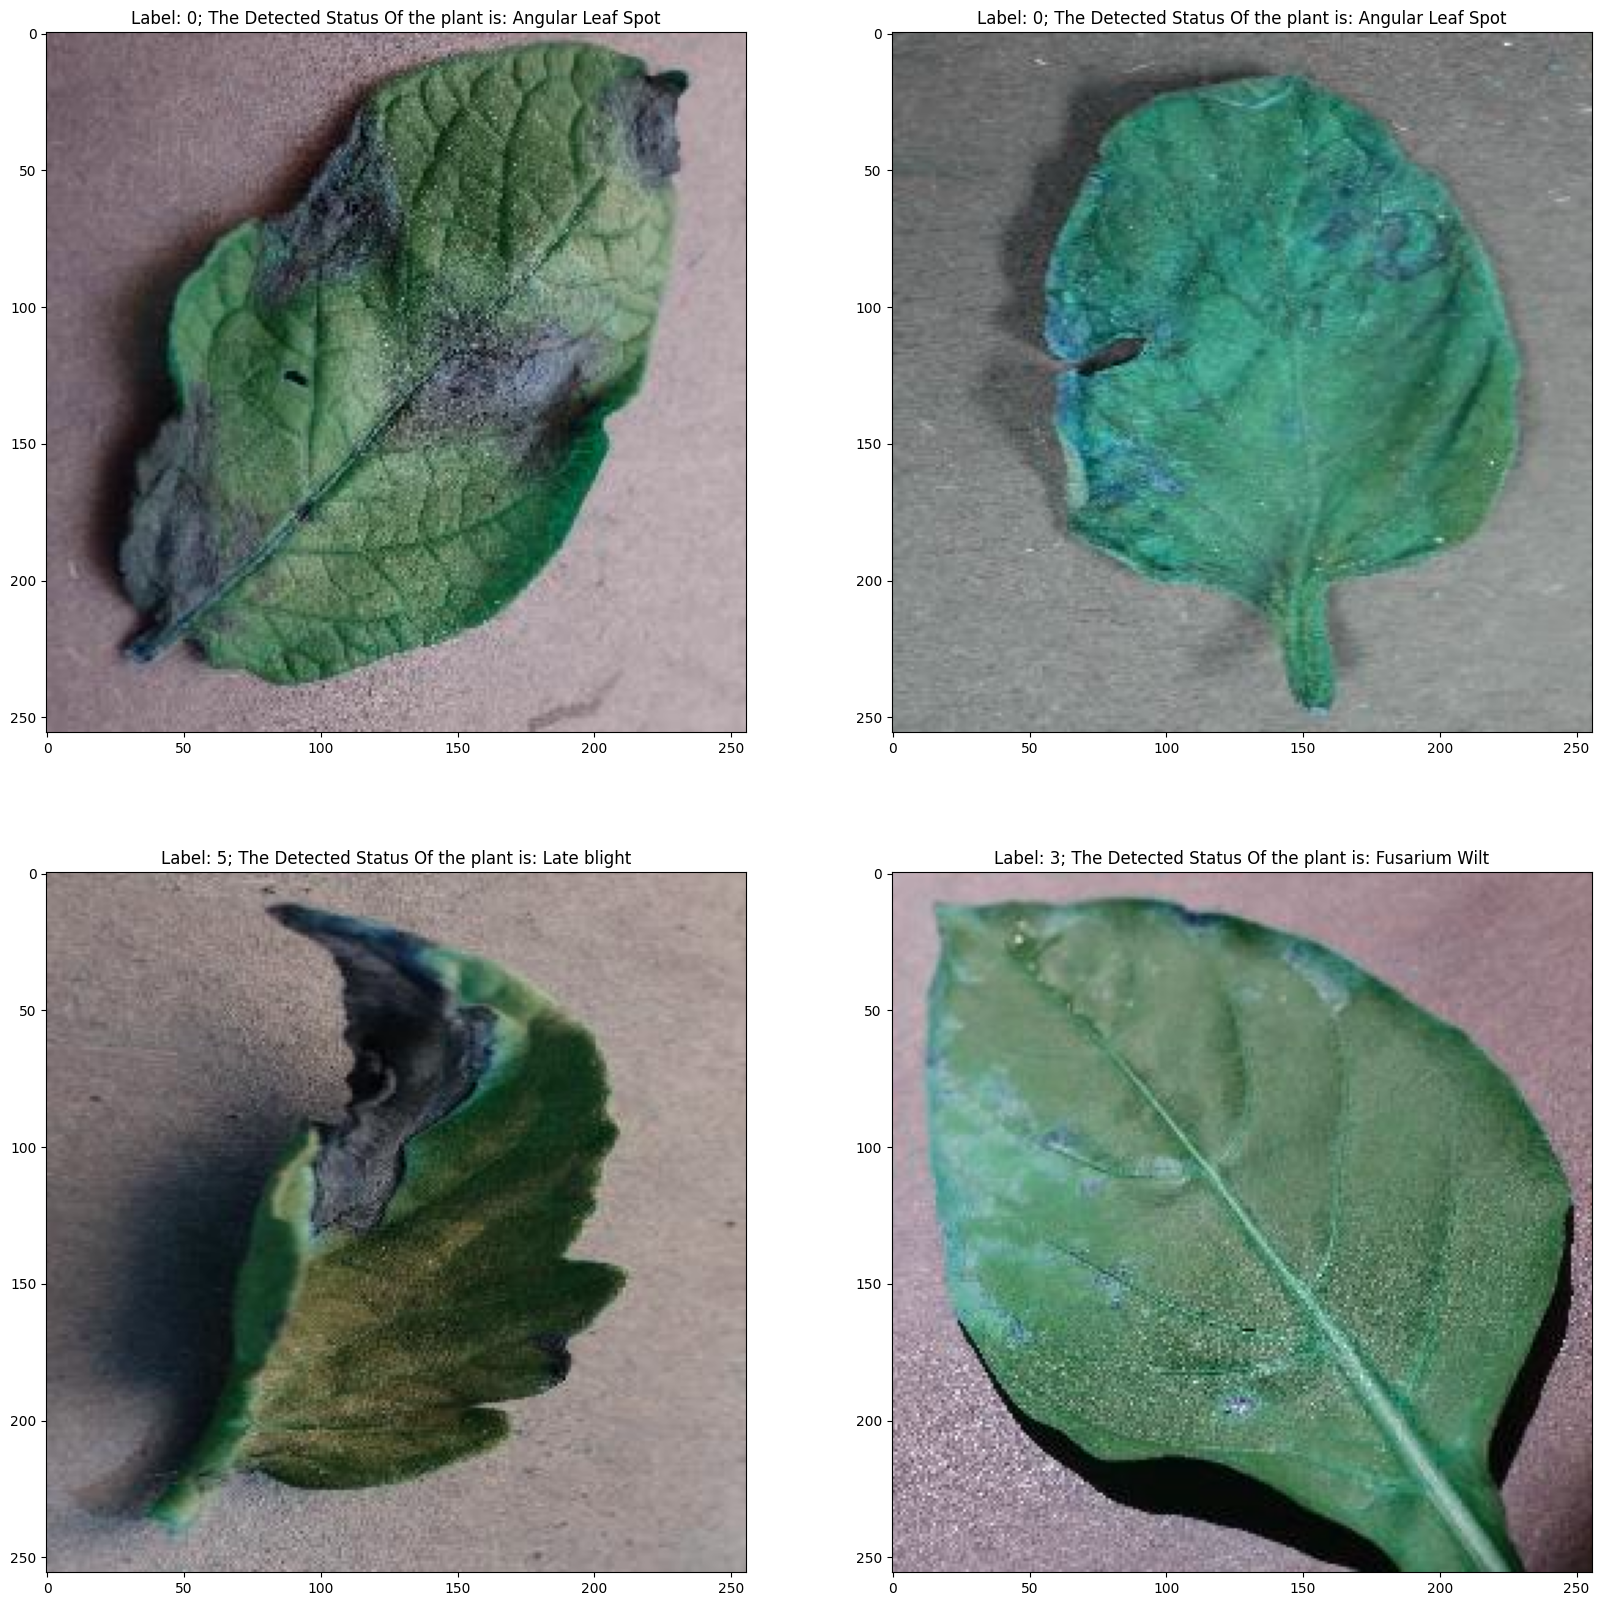

In [21]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
ax=ax.flatten()
for i,j in enumerate(images_list[:4]):
    ax[i].imshow(j) #already in minimal scaled range
    ax[i].title.set_text("Label: "+str(prediction_list[i][0])+"; The Detected Status Of the plant is: "+str(classes[prediction_list[i][0]]))   

In [22]:
model.save('disease.keras')